# Principal Component Analysis

- unsupervised statistical technique to estimate interrelations among of set of variables to identify underlying structure of those variables.
- statistical method to decrease a shape of data if there is a lot of variables by excluding less significant variables without information loss. 
- also known as general factor analysis.
- not an prediction algorithm but used in analysis of data.

# Importing libs

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Loading Data

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()
df_features = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [10]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Preprocessing 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [14]:
scaled = scaler.fit_transform(df_features)

# PCA performing

To perform a PCA:
   - instansiate an PCA object and add a function argument of preferable number of componets
   - fit and transform data within object

In [16]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
pca.fit(scaled)
x_pca = pca.transform(scaled)

In [22]:
x_pca.shape

(569, 2)

Visualization is quite simple, but with PCA we reduced a number of components to 2 for visualize an main interralations within features based on target varible.

It realy hard to interpret those components.
In fact PCA not actualy just define a two main variables in data but define a combination of those, which will represent the most interrelations of dataset.

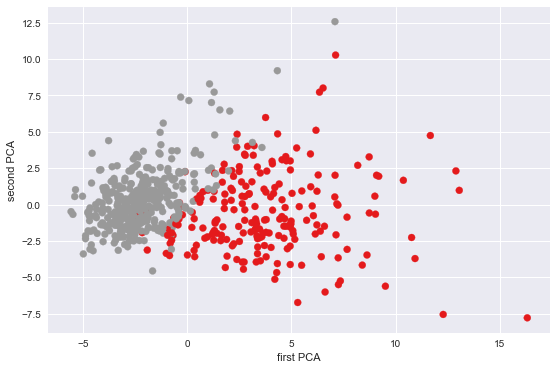

In [26]:
plt.figure(figsize=(9,6))

plt.scatter(x_pca[:,0],x_pca[:,1],c = cancer['target'],cmap = 'Set1')
plt.xlabel('first PCA')
plt.ylabel('second PCA')

In [48]:
# heare are components store
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

To visualize what features were the most principal according to PCA you can use a heatmap.

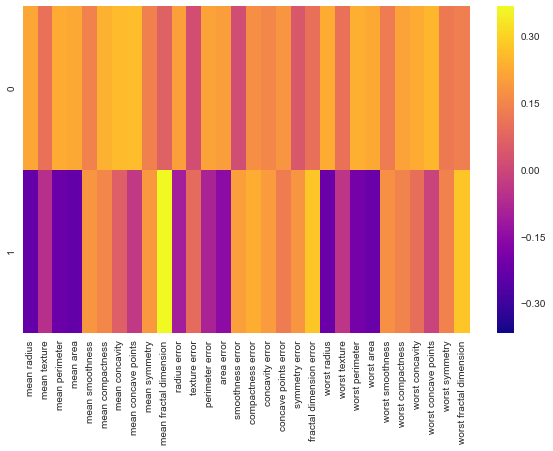

In [52]:
pca_df = pd.DataFrame(pca.components_, columns = cancer['feature_names'])

plt.figure(figsize = (10,6))
sns.heatmap(pca_df, cmap = 'plasma')

Now we have a heatmap that shows a relationships between correlation of various feature and the principal component.

Basicaly, each principal component shown here as a row and if the hotter the color of bigger value - it means that this component higly correlated to specific feature in this columns.

## EXPLANATION

**0 and 1 on chart** - here are represented as and tumor being melignent or benign.

If **color of feature** (here it is a horizontal labels) are getting hotter to a specific component - that means that this feature is highly correlated to this component.

## Making predictions

Now, when i have those principal components reduced (stored in x_pca var) **i can fit it in a classification algorithm** to make a predictions **neither** make a classification **prediction based on all of those features.**

To compare results, lets create two models with default variables and reduced principal components

In [57]:
X_default = df_features
X_principal = x_pca

y = cancer['target']

In [58]:
from sklearn.cross_validation import train_test_split

Now we need create a two train test split samples:

In [59]:
X_train_def,X_test_def, y_train_def, y_test_def = train_test_split(X_default,y,test_size = 0.3, random_state = 101)
X_train_pca,X_test_pca, y_train_pca, y_test_pca = train_test_split(X_principal,y,test_size = 0.3, random_state = 101)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [80]:
def create_model(model,x_train,y_train):
    model = LogisticRegression()
    model.fit(x_train,y_train)
    return model

def make_prediction(model,x_test):
    return model.predict(x_test)

def validate(y_test,y_pred):
    print("===================Confusion matrix===================")
    print("\n")
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print("===================Classification report===================")
    print("\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    print("Accuracy score: {0}".format(accuracy_score(y_test,y_pred)))

In [71]:
# Creating an empty variables where models will be stored:
lg_def = ''
lg_pca = ''

In [75]:
# creating a models
lg_def = create_model(lg_def,X_train_def,y_train_def)
lg_pca = create_model(lg_pca,X_train_pca,y_train_pca)

In [82]:
# making predictions
y_pred_def = make_prediction(lg_def, X_test_def)
y_pred_pca = make_prediction(lg_pca, X_test_pca)

In [86]:
# validating
print("Default model evaluation")
print("\n")
validate(y_pred_def,y_test_def)

Default model evaluation


===================Confusion matrix===================


[[ 58   3]
 [  8 102]]


===================Classification report===================


             precision    recall  f1-score   support

          0       0.88      0.95      0.91        61
          1       0.97      0.93      0.95       110

avg / total       0.94      0.94      0.94       171



Accuracy score: 0.935672514619883


In [87]:
# validating
print("PCA model evaluation")
print("\n")
validate(y_pred_pca,y_test_pca)

PCA model evaluation


===================Confusion matrix===================


[[ 63   5]
 [  3 100]]


===================Classification report===================


             precision    recall  f1-score   support

          0       0.95      0.93      0.94        68
          1       0.95      0.97      0.96       103

avg / total       0.95      0.95      0.95       171



Accuracy score: 0.9532163742690059
